In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

data = pd.read_csv('AMZN.csv')

data

,Date,Open,High,Low,Close,Adj Close,Volume
0,15-05-1997,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,16-05-1997,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,19-05-1997,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,20-05-1997,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,21-05-1997,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...,...
6511,30-03-2023,101.550003,103.040001,101.010002,102.000000,102.000000,53633400
6512,31-03-2023,102.160004,103.489998,101.949997,103.290001,103.290001,56704300
6513,03-04-2023,102.300003,103.290001,101.430000,102.410004,102.410004,41135700
6514,04-04-2023,102.750000,104.199997,102.110001,103.949997,103.949997,48662500


In [ ]:
data = data[['Date', 'Close']]
data

,Date,Close
0,15-05-1997,0.097917
1,16-05-1997,0.086458
2,19-05-1997,0.085417
3,20-05-1997,0.081771
4,21-05-1997,0.071354
...,...,...
6511,30-03-2023,102.000000
6512,31-03-2023,103.290001
6513,03-04-2023,102.410004
6514,04-04-2023,103.949997


In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

<ipython-input-4-27440ea654b2>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])
<ipython-input-4-27440ea654b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


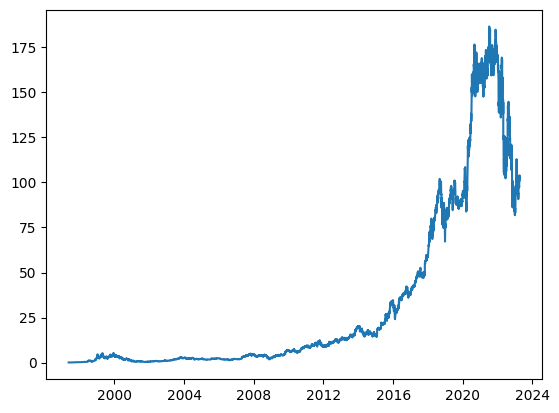

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

plt.plot(data['Date'], data['Close'])

In [ ]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)

    df.set_index('Date', inplace=True)

    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)

    df.dropna(inplace=True)

    return df

lookback = 7
shifted_df = prepare_dataframe_for_lstm(data, lookback)
shifted_df

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,
1997-05-27,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458,0.097917
1997-05-28,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458
1997-05-29,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417
1997-05-30,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771
1997-06-02,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354
...,...,...,...,...,...,...,...,...
2023-03-30,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997,100.610001
2023-03-31,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997
2023-04-03,102.410004,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999


In [ ]:
shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np

array([[7.91670000e-02, 7.50000000e-02, 6.97920000e-02, ...,
        8.54170000e-02, 8.64580000e-02, 9.79170000e-02],
       [7.65630000e-02, 7.91670000e-02, 7.50000000e-02, ...,
        8.17710000e-02, 8.54170000e-02, 8.64580000e-02],
       [7.52600000e-02, 7.65630000e-02, 7.91670000e-02, ...,
        7.13540000e-02, 8.17710000e-02, 8.54170000e-02],
       ...,
       [1.02410004e+02, 1.03290001e+02, 1.02000000e+02, ...,
        9.80400010e+01, 9.81299970e+01, 9.87099990e+01],
       [1.03949997e+02, 1.02410004e+02, 1.03290001e+02, ...,
        9.72399980e+01, 9.80400010e+01, 9.81299970e+01],
       [1.01099998e+02, 1.03949997e+02, 1.02410004e+02, ...,
        1.00250000e+02, 9.72399980e+01, 9.80400010e+01]])

In [ ]:
shifted_df_as_np.shape

(6509, 8)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[-0.99991063, -0.99995531, -1.        , ..., -0.99983244,
        -0.99982128, -0.99969839],
       [-0.99993855, -0.99991063, -0.99994415, ..., -0.99987154,
        -0.99983244, -0.99982128],
       [-0.99995253, -0.99993855, -0.99989946, ..., -0.99998325,
        -0.99987154, -0.99983244],
       ...,
       [ 0.09747299,  0.10690997,  0.09308121, ...,  0.0506149 ,
         0.05158   ,  0.05779984],
       [ 0.11398769,  0.09747299,  0.10691495, ...,  0.04203581,
         0.0506149 ,  0.05158   ],
       [ 0.08342464,  0.11398769,  0.09747802, ...,  0.07431453,
         0.04203581,  0.0506149 ]])

In [ ]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((6509, 7), (6509,))

In [ ]:
X = dc(np.flip(X, axis=1))
X

array([[-0.99969839, -0.99982128, -0.99983244, ..., -0.99998325,
        -1.        , -0.99995531],
       [-0.99982128, -0.99983244, -0.99987154, ..., -1.        ,
        -0.99994415, -0.99991063],
       [-0.99983244, -0.99987154, -0.99998325, ..., -0.99994415,
        -0.99989946, -0.99993855],
       ...,
       [ 0.05779984,  0.05158   ,  0.0506149 , ...,  0.07431453,
         0.09308121,  0.10690997],
       [ 0.05158   ,  0.0506149 ,  0.04203581, ...,  0.09308121,
         0.10691495,  0.09747299],
       [ 0.0506149 ,  0.04203581,  0.07431453, ...,  0.10691495,
         0.09747802,  0.11398769]])

In [ ]:
split_index = int(len(X) * 0.95)

split_index

6183

In [ ]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6183, 7), (326, 7), (6183,), (326,))

In [ ]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6183, 7, 1), (326, 7, 1), (6183, 1), (326, 1))

In [ ]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([6183, 7, 1]),
 torch.Size([326, 7, 1]),
 torch.Size([6183, 1]),
 torch.Size([326, 1]))

In [ ]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [ ]:
train_dataset

In [ ]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1])


In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [ ]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [ ]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000

Val Loss: 0.003
***************************************************

Epoch: 2
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000

Val Loss: 0.004
***************************************************

Epoch: 3
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000

Val Loss: 0.003
***************************************************

Epoch: 4
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000

Val Loss: 0.003
***************************************************

Epoch: 5
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000

Val Loss: 0.003
***************************************************

Epoch: 6
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000

Val Loss: 0.003
***************************************************

Epoch: 7
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000

Val Loss: 0.002
*****************

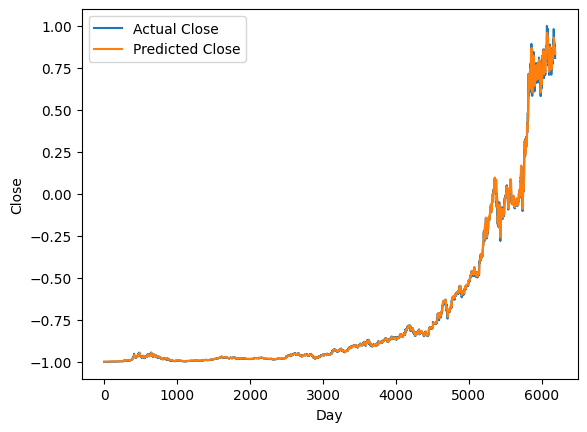

In [ ]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [ ]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([  0.22928397,   0.22926174,   0.22908388, ..., 172.13982988,
       170.85444722, 171.5392858 ])

In [ ]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([7.91646265e-02, 7.65634249e-02, 7.52572660e-02, ...,
       1.69091505e+02, 1.73315001e+02, 1.68871003e+02])

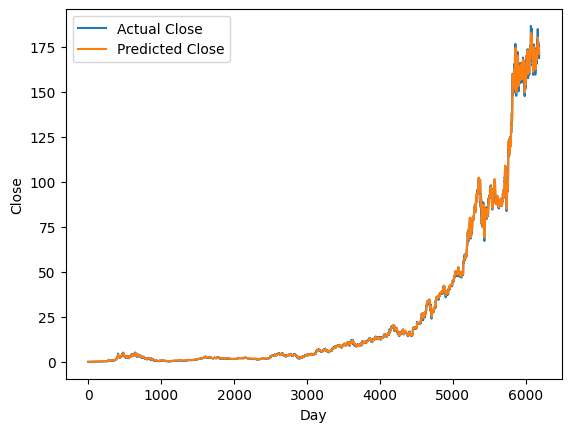

In [ ]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [ ]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([170.61466979, 170.44668108, 169.33551223, 169.80767478,
       170.39370105, 170.78027963, 170.63422327, 170.78562654,
       170.37946114, 169.78381932, 168.71841605, 169.40292114,
       168.91976462, 167.34473705, 165.87309057, 164.64482318,
       163.48816665, 164.30595553, 165.14867816, 164.15681998,
       163.70232114, 162.120546  , 159.88664741, 156.32962649,
       150.00010263, 146.44946244, 142.43133964, 139.69800755,
       138.88760542, 141.30179563, 146.23917641, 150.04987006,
       152.16159   , 147.54593561, 151.75965988, 155.47489833,
       159.19250453, 161.44722386, 161.73977011, 159.21194685,
       157.15714209, 156.9964901 , 157.73672093, 157.07946176,
       155.73507407, 153.75047952, 149.71186948, 149.89246401,
       151.89734571, 153.62360981, 153.60460103, 153.74776716,
       151.89248791, 148.97641863, 143.34865227, 138.62171037,
       137.44172084, 141.28495452, 144.64572922, 144.95695076,
       147.20309946, 150.86551351, 154.86568357, 158.93

In [ ]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([170.01749949, 167.07899763, 170.41700626, 171.03700377,
       171.0684961 , 169.66949429, 170.66099675, 169.20100565,
       168.64449858, 166.71699707, 170.40449492, 167.52200227,
       164.35699578, 163.25399737, 162.55400179, 161.48599177,
       165.36199892, 165.20699954, 161.21400501, 162.13799851,
       158.91749416, 156.29899568, 151.66749509, 142.64300408,
       144.54400445, 139.98599336, 138.87249844, 139.63749627,
       143.97799855, 149.57350001, 151.19349835, 150.61250219,
       138.84550541, 157.63949825, 157.93550165, 161.41349717,
       161.18949925, 159.003495  , 153.29350176, 155.1670061 ,
       156.51049894, 158.10049453, 154.6524962 , 152.60149876,
       150.19749381, 144.82699629, 151.35800212, 153.78849709,
       153.56300403, 151.14199678, 152.05250627, 147.89849848,
       145.64100565, 137.45300383, 136.01449488, 139.27900567,
       146.81750468, 145.52450739, 141.8529947 , 147.36650272,
       153.10400311, 157.23899657, 161.25050521, 161.49

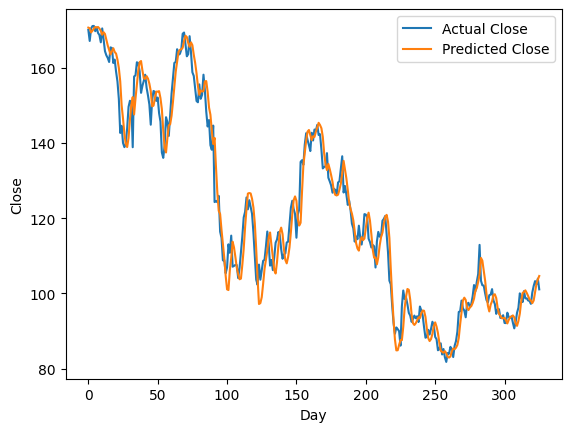

In [ ]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and stored the training history in 'history'
# For example: history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Check if 'history' exists before trying to access its attributes
if 'history' in locals() and hasattr(history, 'history'):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
else:
    print("The 'history' variable is not defined or does not contain training history. Please train your model first.")

# Interpretation:
# - If validation loss increases while training loss decreases, overfitting is occurring.

The 'history' variable is not defined or does not contain training history. Please train your model first.


Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predictions on train and test data
import torch

# Predictions on train and test data
with torch.no_grad():  # Disable gradient calculation during inference
    train_predictions = model(X_train.to(device)).cpu().detach().numpy()  # Move data to device, then back to CPU
    test_predictions = model(X_test.to(device)).cpu().detach().numpy()

# Evaluate performance
# ... (rest of your code)

# Evaluate performance
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)

# Large differences between training and testing metrics indicate overfitting.


Training MSE: 0.00015228686
Testing MSE: 0.002416841
Training MAE: 0.0053651845
Testing MAE: 0.03867254


Add Dropout Regularization
Dropout layers help reduce overfitting by randomly dropping neurons during training.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # 20% dropout
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 7, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Retrain the Model with Dropout Regularization
Run the training process using the updated model architecture with dropout

In [ ]:
from sklearn.model_selection import train_test_split
# Assuming you have your data in X and y
# Split into training and remaining data
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42)
# Split remaining data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

# Now you have X_train, y_train, X_val, y_val, X_test, y_test
# ... rest of your code ...
history_dropout = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),  # Validation set for loss tracking
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1075 - val_loss: 0.0011
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0067 - val_loss: 7.7153e-04
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0053 - val_loss: 6.0602e-04
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0045 - val_loss: 0.0021
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0038 - val_loss: 8.0997e-04
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0039 - val_loss: 8.4338e-04
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0036 - val_loss: 0.0013
Epoch 8/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0036 - val_loss: 6.9088e-04
Epoch 9/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0030 - val_loss: 8.6663e-04
Epoch 10/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0026 - val_loss: 8.2752e-04
Epoch 11/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0028 - val_loss: 4.2224e-04
Epoch 12/

Visualize Training and Validation Loss
Compare the new loss curves after applying dropout.

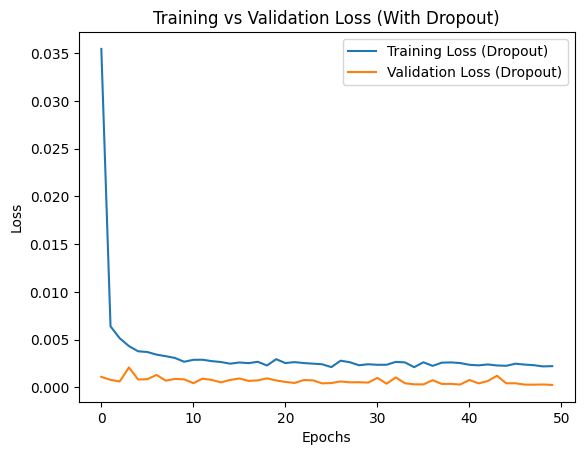

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for the new training
plt.plot(history_dropout.history['loss'], label='Training Loss (Dropout)')
plt.plot(history_dropout.history['val_loss'], label='Validation Loss (Dropout)')
plt.title('Training vs Validation Loss (With Dropout)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Interpretation:
# - If validation loss aligns more closely with training loss, overfitting has been reduced.


Reevaluate Model Performance
Evaluate the model's metrics on both the training and testing datasets to ensure consistent improvement.

In [ ]:
from sklearn.metrics import mean_squared_error

# Predict again with the updated model
train_predictions_dropout = model.predict(X_train)
test_predictions_dropout = model.predict(X_test)

# Evaluate MSE
train_mse_dropout = mean_squared_error(y_train, train_predictions_dropout)
test_mse_dropout = mean_squared_error(y_test, test_predictions_dropout)

print("Training MSE (Dropout):", train_mse_dropout)
print("Testing MSE (Dropout):", test_mse_dropout)

# Compare with the previous MSE values:
# - A reduced gap between training and testing errors confirms improved generalization.


143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Training MSE (Dropout): 0.000341023687912513
Testing MSE (Dropout): 0.000282296588859476


Apply L2 Regularization
Add L2 regularization to dense layers.

In [ ]:
import numpy as np # Import numpy for reshaping

# ... (your existing code) ...

# Reshape X_train to have 3 dimensions (samples, timesteps, features)
# Assuming each sample has 1 timestep and 7 features based on your X_train shape
timesteps = 1  # Adjust if you have multiple timesteps per sample
X_train = X_train.reshape(X_train.shape[0], timesteps, X_train.shape[1])

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))) # Now X_train.shape[2] is valid
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25, kernel_regularizer=l2(0.01)))  # L2 regularization
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

# ... (rest of your code) ...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 1, 50)               │          11,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,101 (129.30 KB)

 Trainable params: 33,101 (129.30 KB)

 Non-trainable params: 0 (0.00 B)

Retrain the Model
Train the model using the updated architecture with L2 regularization.

In [ ]:
import numpy as np # Import numpy for reshaping

# ... (your existing code) ...

# Reshape X_train, X_val, and X_test to have 3 dimensions (samples, timesteps, features)
# Assuming each sample has 1 timestep and 7 features based on your X_train shape
timesteps = 1  # Adjust if you have multiple timesteps per sample

# The original X_train shape is (4556, 1, 7), it has already been reshaped.
# Remove this line to avoid the error:
# X_train = X_train.reshape(X_train.shape[0], timesteps, X_train.shape[1])

# Reshape X_val and X_test, ensuring the last dimension is the number of features (7)
X_val = X_val.reshape(X_val.shape[0], timesteps, 7) # Reshape X_val, using 7 for the feature dimension
X_test = X_test.reshape(X_test.shape[0], timesteps, 7) # Reshape X_test, using 7 for the feature dimension

# ... (Rest of your code remains unchanged) ...

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25, kernel_regularizer=l2(0.01)))  # L2 regularization
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

# ... (rest of your code) ...

history_l2 = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),  # Use validation data to monitor overfitting
    epochs=50,
    batch_size=32,
    verbose=1
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 1, 50)               │          11,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,101 (129.30 KB)

 Trainable params: 33,101 (129.30 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.5155 - val_loss: 0.1081
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0862 - val_loss: 0.0264
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0252 - val_loss: 0.0086
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0124 - val_loss: 0.0046
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0096 - val_loss: 0.0038
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0084 - val_loss: 0.0029
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0078 - val_loss: 0.0027
Epoch 8/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0074 - val_loss: 0.0028
Epoch 9/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0067 - val_loss: 0.0025
Epoch 10/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0065 - val_loss: 0.0036
Epoch 11/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0065 - val_loss: 0.0021
Epoch 12/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Plot Training and Validation Loss
Check the impact of L2 regularization by comparing the training and validation loss curves

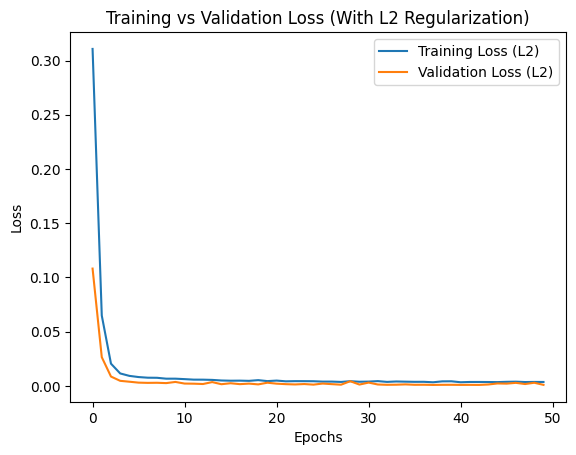

In [ ]:
import matplotlib.pyplot as plt

# Plot loss curves
plt.plot(history_l2.history['loss'], label='Training Loss (L2)')
plt.plot(history_l2.history['val_loss'], label='Validation Loss (L2)')
plt.title('Training vs Validation Loss (With L2 Regularization)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Interpretation:
# - If the validation loss aligns more closely with the training loss than before, L2 regularization has reduced overfitting.


Evaluate Performance on Testing Data
Evaluate the model to ensure the new architecture generalizes better.

In [ ]:
from sklearn.metrics import mean_squared_error

# Make predictions
train_predictions_l2 = model.predict(X_train)
test_predictions_l2 = model.predict(X_test)

# Calculate MSE for training and testing data
train_mse_l2 = mean_squared_error(y_train, train_predictions_l2)
test_mse_l2 = mean_squared_error(y_test, test_predictions_l2)

print("Training MSE (L2 Regularization):", train_mse_l2)
print("Testing MSE (L2 Regularization):", test_mse_l2)

# Compare with previous results:
# - Smaller gaps between training and testing MSE values indicate improved generalization.


143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training MSE (L2 Regularization): 0.0004978928968686062
Testing MSE (L2 Regularization): 0.0004546137216982107


Use Early Stopping
Stop training when the validation loss stops improving

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop after 5 epochs of no improvement
    restore_best_weights=True  # Restore the best weights
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)


Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0040 - val_loss: 0.0019
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0035 - val_loss: 9.2616e-04
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0034 - val_loss: 7.8110e-04
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0030 - val_loss: 8.5404e-04
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0031 - val_loss: 8.8842e-04
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0032 - val_loss: 0.0019
Epoch 8/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0038 - val_loss: 0.0016
Epoch 9/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0035 - val_loss: 0.0015


Verify Early Stopping Worked

In [ ]:
print(f"Model trained for {len(history.history['loss'])} epochs.")


Model trained for 9 epochs.


Plot Training and Validation Loss
Visualize the training and validation loss to confirm Early Stopping's effect.

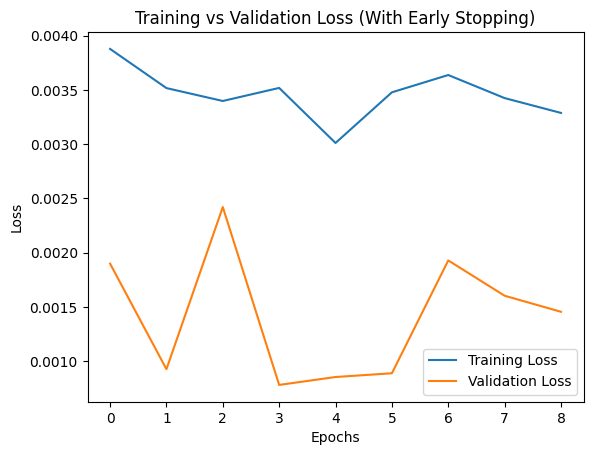

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss (With Early Stopping)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Interpretation:
# - The validation loss curve should flatten out or slightly increase before Early Stopping kicked in.
# - Training loss should not decrease significantly beyond the stopping point.


Evaluate Model Performance
Evaluate the model on the test dataset to ensure it generalizes well.

In [ ]:
from sklearn.metrics import mean_squared_error

# Predictions
test_predictions = model.predict(X_test)

# Evaluate MSE on testing data
test_mse = mean_squared_error(y_test, test_predictions)
print("Testing MSE (With Early Stopping):", test_mse)

# Compare this with earlier results to confirm the model's performance has stabilized.


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Testing MSE (With Early Stopping): 0.00035927745079611313


In [ ]:
model.save('best_model.h5')  # Save the model in H5 format


           Technique  Training MSE  Testing MSE
0            Dropout      0.000341     0.000282
1  L2 Regularization      0.000498     0.000455
2     Early Stopping           NaN          NaN


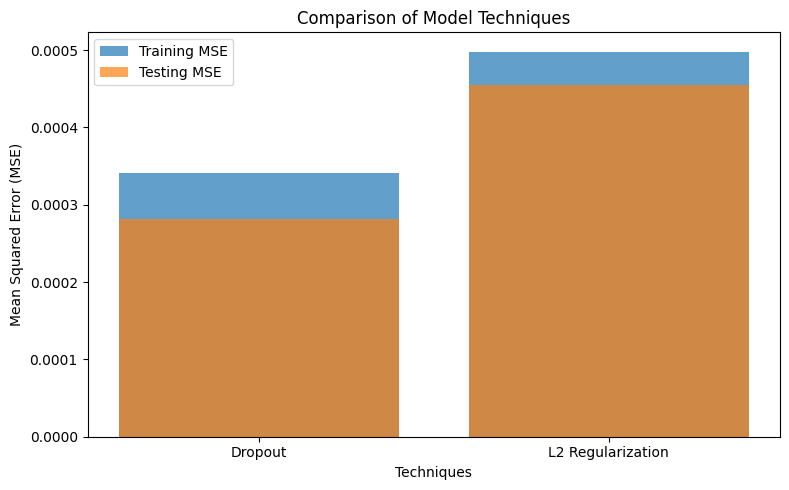

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Store results in a dictionary
results = {
    "Technique": ["Dropout", "L2 Regularization", "Early Stopping"],
    "Training MSE": [0.000341, 0.000498, None],  # Replace None with Early Stopping result
    "Testing MSE": [0.000282, 0.000455, None]    # Replace None with Early Stopping result
}

# Create a DataFrame for comparison
results_df = pd.DataFrame(results)

# Display the comparison table
print(results_df)

# Visualize the results
fig, ax = plt.subplots(figsize=(8, 5))

# Plot training and testing MSE
ax.bar(results_df["Technique"], results_df["Training MSE"], label="Training MSE", alpha=0.7)
ax.bar(results_df["Technique"], results_df["Testing MSE"], label="Testing MSE", alpha=0.7)

# Add labels and legend
ax.set_title("Comparison of Model Techniques")
ax.set_ylabel("Mean Squared Error (MSE)")
ax.set_xlabel("Techniques")
ax.legend()

plt.tight_layout()
plt.show()
